In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time

from evaluate_models import *
from manipulate_data import *

In [2]:
model_names = ['ARMA', 'LSTM', 'GRU']

frequencies = ['D', '60min', '15min', '5min', 'min']
frequencies_number_of_samples = np.multiply([1, 7, 26, 78, 390], 252)

predictions, returns, dates, number_of_study_periods, study_periods = \
            append_periods(model_names, frequencies, frequencies_number_of_samples)

Frequency: D
Frequency: 60min
Frequency: 15min
Frequency: 5min
Frequency: min


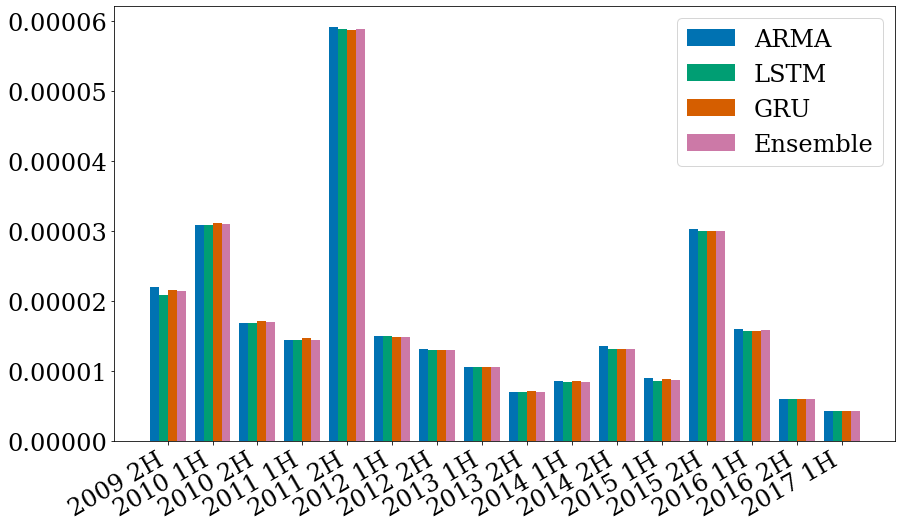

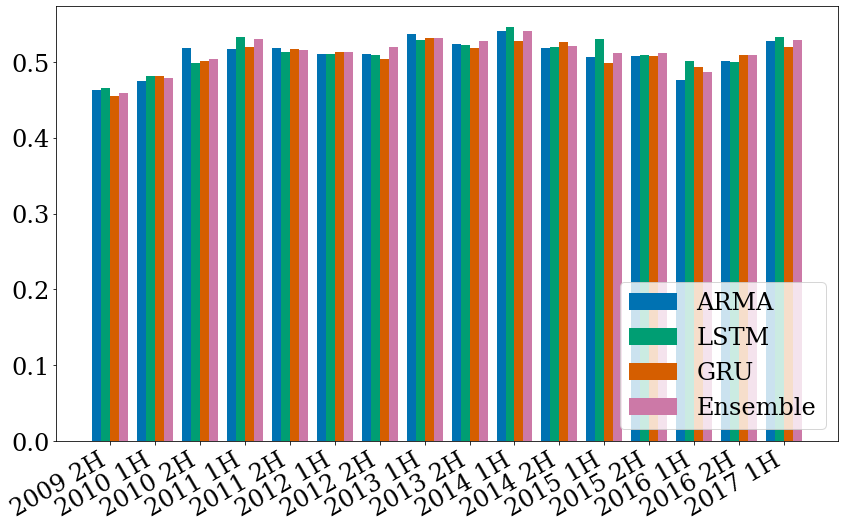

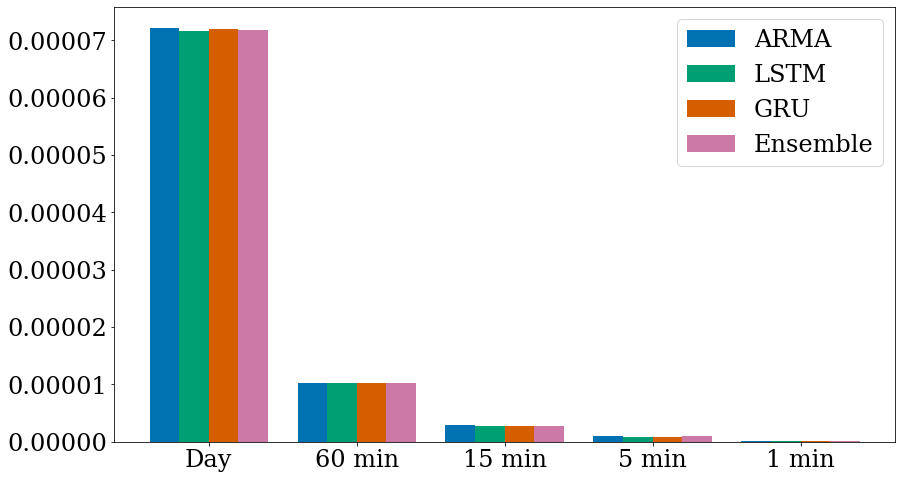

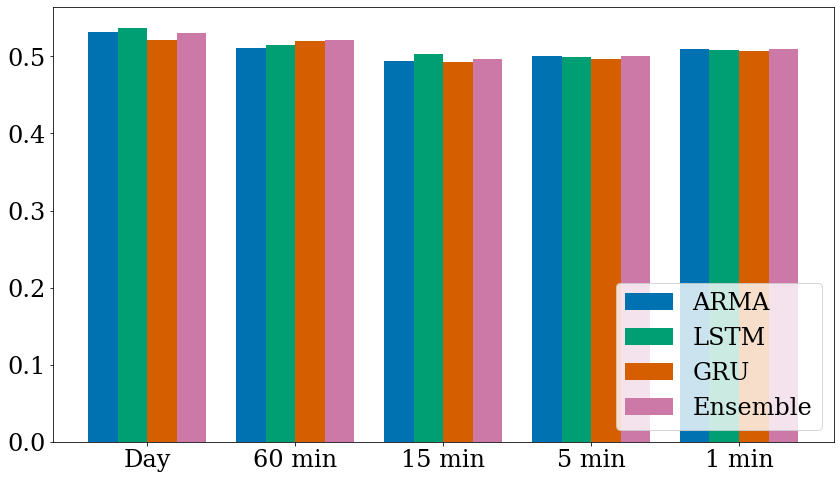

In [3]:
mse, directional_accuracy = calculate_da_mse(model_names, frequencies, number_of_study_periods, study_periods)

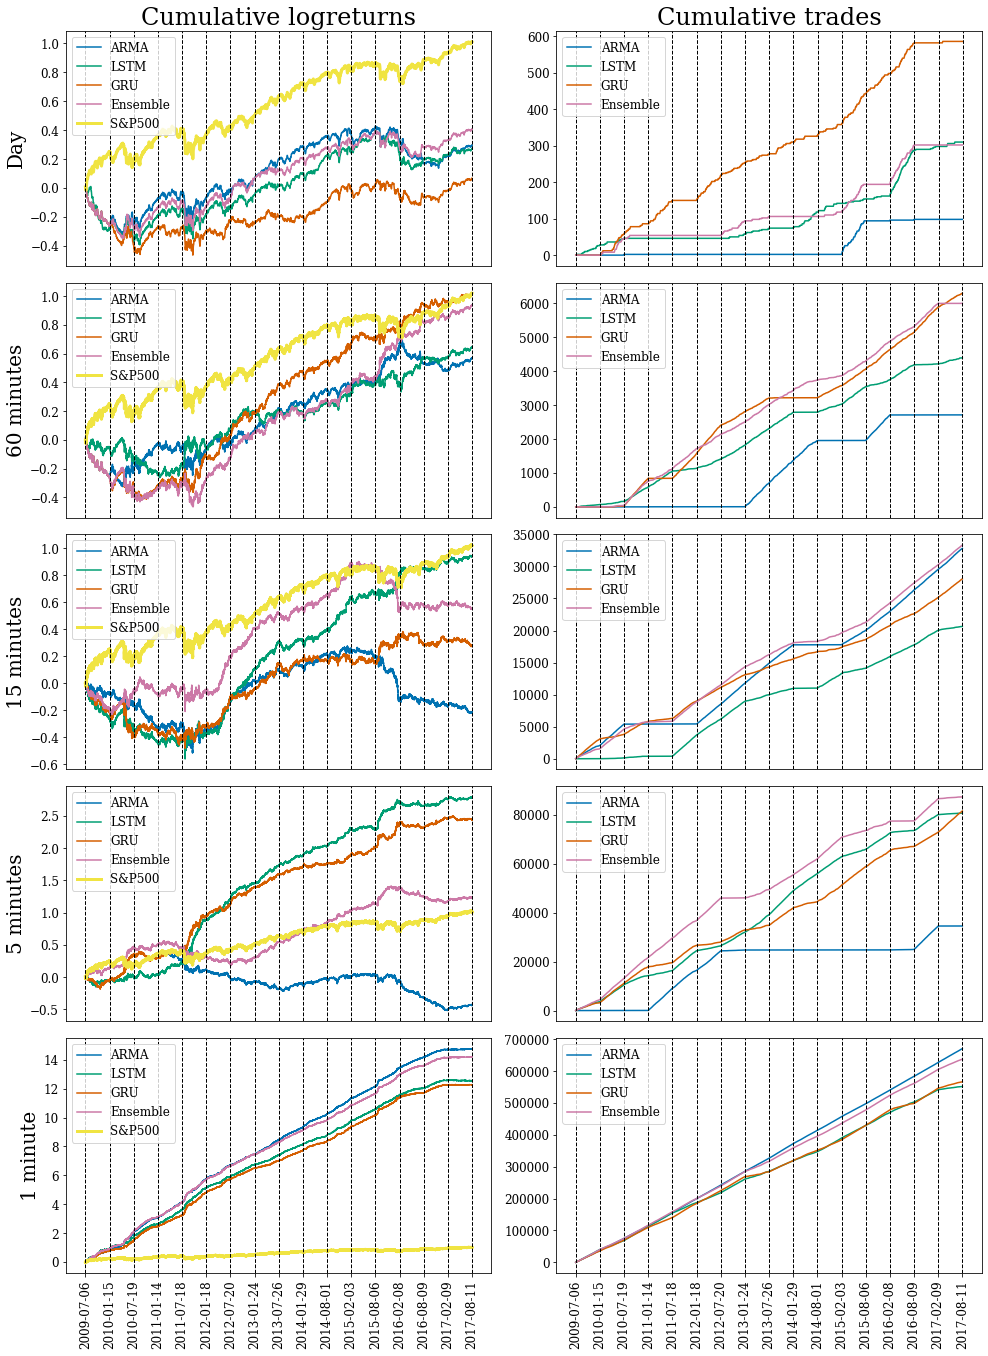

[0.02163528 0.02012702 0.00812165 0.02814142 0.06370267]
[0.01425372 0.01598082 0.02403149 0.02240591 0.02423947]
[-0.00160266  0.01155716  0.00401451  0.00709408  0.0124295 ]
[-0.00241814  0.01885569  0.01658209  0.00854758  0.00714943]
[0.04596168 0.03904583 0.03821339 0.04423939 0.00330787]


In [4]:
transaction_cost = 0
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
logr = create_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(logr, returns, trading_strategy, frequencies, dates, number_of_study_periods, transaction_cost)
shapre_ratios = create_shapre_ratio(logr, returns)

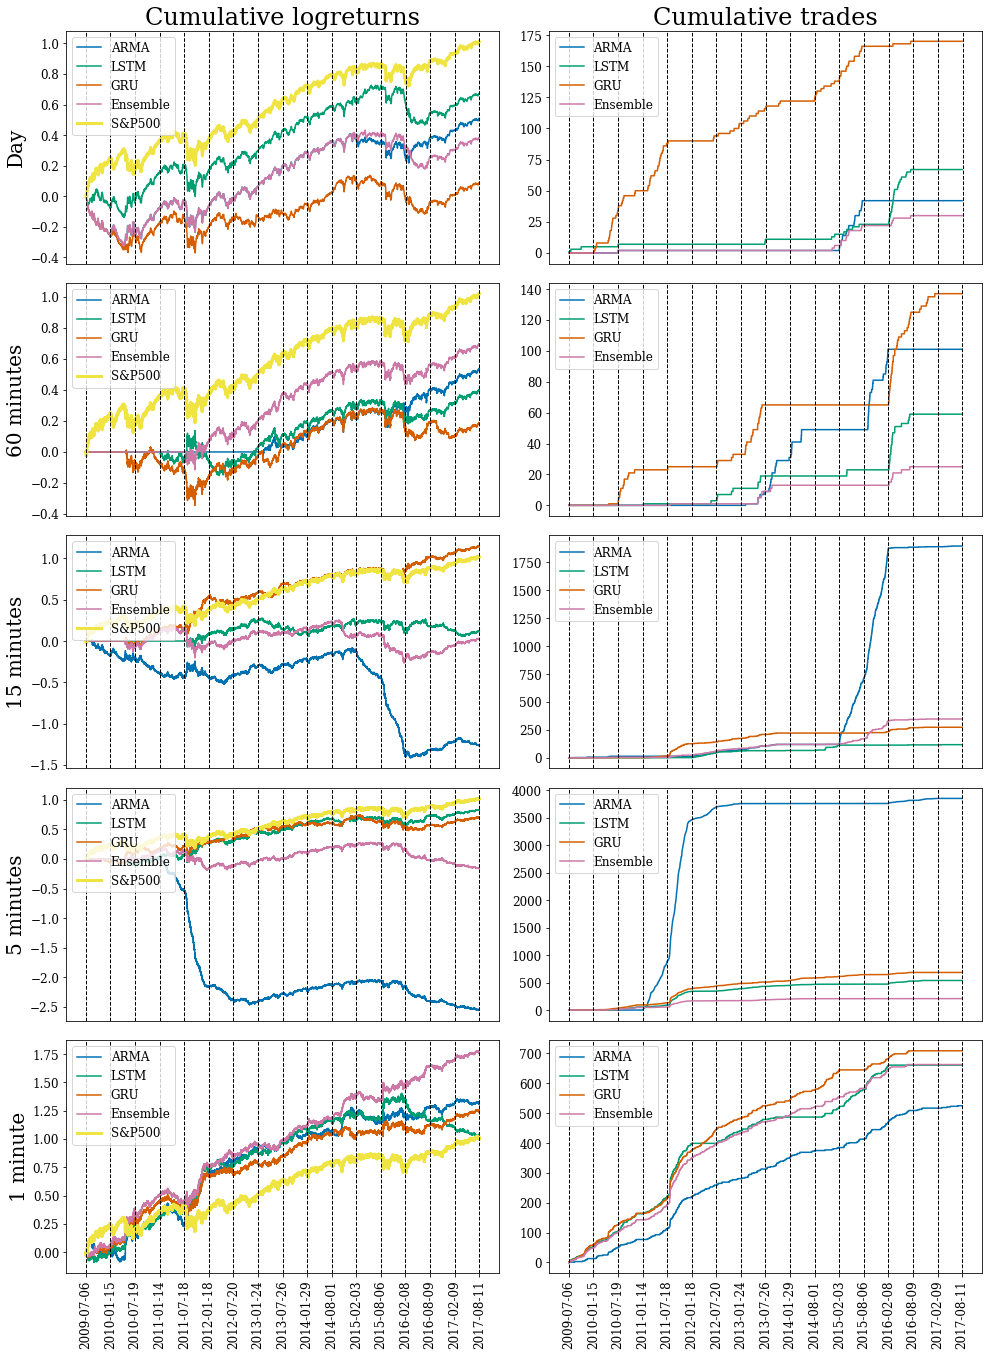

[0.03407116 0.04366444 0.00935805 0.026658   0.06370267]
[0.02047586 0.01176707 0.0059756  0.02033865 0.02423947]
[-0.01365823  0.00233028  0.01493394  0.00109333  0.0124295 ]
[-0.01913227  0.00627112  0.00522651 -0.00059351  0.00714943]
[0.00427563 0.00342924 0.00405539 0.00567201 0.00330787]


In [5]:
transaction_cost = 0.0005
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
logr = create_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(logr, returns, trading_strategy, frequencies, dates, number_of_study_periods, transaction_cost)
shapre_ratios = create_shapre_ratio(logr, returns)

In [6]:
from arch.bootstrap.multiple_comparison import MCS  

In [7]:
MCS_values = np.zeros((5, len(model_names)+1))
for frequency_index in range(5):
    losses = np.transpose(np.square(predictions[frequency_index]-returns[frequency_index]))
    mcs = MCS(losses, size=0.1)
    mcs.compute()
    MCS_values[frequency_index] = mcs.pvalues.sort_index(axis = 0).values.flatten()
    print(MCS_values)

[[0.021 1.    0.215 0.215]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]]
[[0.021 1.    0.215 0.215]
 [0.059 0.575 0.577 1.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]]
[[0.021 1.    0.215 0.215]
 [0.059 0.575 0.577 1.   ]
 [0.003 0.007 1.    0.003]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]]
[[0.021 1.    0.215 0.215]
 [0.059 0.575 0.577 1.   ]
 [0.003 0.007 1.    0.003]
 [0.    0.023 1.    0.   ]
 [0.    0.    0.    0.   ]]
[[0.021 1.    0.215 0.215]
 [0.059 0.575 0.577 1.   ]
 [0.003 0.007 1.    0.003]
 [0.    0.023 1.    0.   ]
 [0.    0.019 0.266 1.   ]]


In [11]:
from dm_test import dm_test
import random

print(predictions[0].shape, returns[0].shape)

n=32
actual_lst = list(returns[0].astype('float16')*100)
pred1_lst = list(predictions[0][0].astype('float16')*100)
pred2_lst = list(predictions[0][1].astype('float16')*100)
# print(actual_lst, pred1_lst, pred2_lst)

rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
print(rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print(rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="poly", power=4)
print(rt)

(4, 2016) (2016,)
dm_return(DM=2.9118046003821543, p_value=0.0036329752605764667)
dm_return(DM=2.8521035078126933, p_value=0.004387370644355121)
dm_return(DM=0.5168881917750889, p_value=0.6052909377913002)


In [9]:
!pip list

Package               Version             
--------------------- --------------------
absl-py               0.8.0               
arch                  4.9.1               
astor                 0.8.0               
attrs                 19.1.0              
backcall              0.1.0               
bayesian-optimization 1.0.1               
bleach                3.1.0               
certifi               2019.9.11           
colorama              0.4.1               
cycler                0.10.0              
Cython                0.29.13             
decorator             4.4.0               
defusedxml            0.6.0               
entrypoints           0.3                 
gast                  0.3.2               
google-pasta          0.1.7               
grpcio                1.24.0              
h5py                  2.10.0              
ipykernel             5.1.2               
ipython               7.8.0               
ipython-genutils      0.2.0               
ipywidgets 